In [1]:
import pandas as pd
df = pd.read_excel("MemurlarNetMaas.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Mezun       200 non-null    object
 1   Gosterge    200 non-null    object
 2   HizmetYili  200 non-null    int64 
 3   72denKucuk  200 non-null    int64 
 4   72denBuyuk  200 non-null    int64 
 5   Maas        200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HizmetYili,200.0,13.040,7.229782,0.0,7.00,13.0,19.00,25.0
72denKucuk,200.0,1.060,0.980411,0.0,0.00,1.0,2.00,3.0
72denBuyuk,200.0,0.990,1.002459,0.0,0.00,1.0,2.00,3.0
Maas,200.0,11520.225,669.260759,10415.0,11000.75,11315.5,12031.25,13210.0


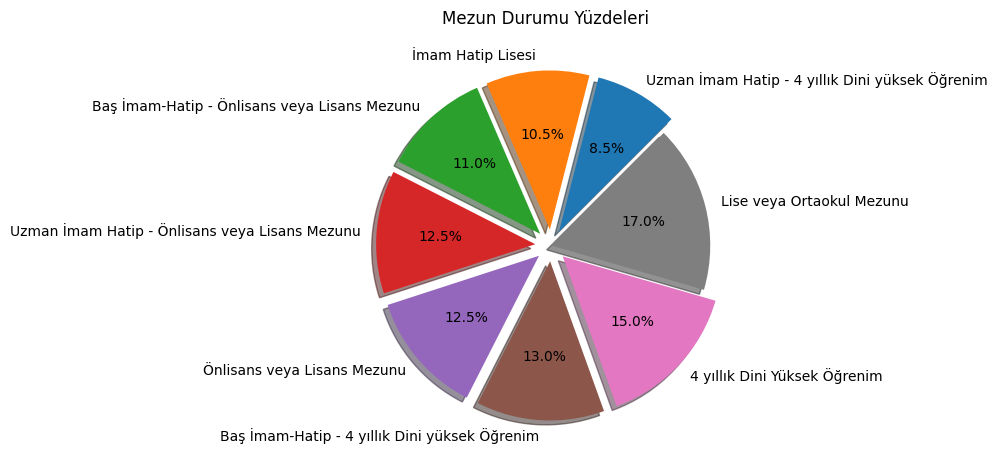

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = [x for x in df["Mezun"].value_counts().sort_values().index]
lode = tuple([0.1 for x in range(len(labels)-1)])
lode = lode + (0,)
plt.figure(figsize=([6,5]))
patches,ax,text=plt.pie(df["Mezun"].value_counts().sort_values(),explode=lode,labels=labels,autopct="%1.1f%%",shadow=True,startangle=45)
plt.title("Mezun Durumu Yüzdeleri\n")
plt.axis("equal")
plt.show()

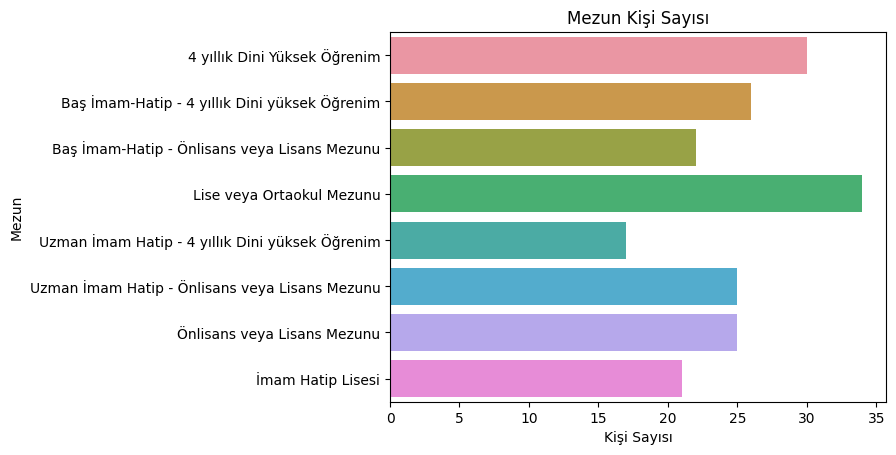

In [210]:
sns.barplot(data=df.groupby("Mezun")["Gosterge"].count().reset_index(), x="Gosterge",y="Mezun")
plt.title("Mezun Kişi Sayısı")
plt.xlabel("Kişi Sayısı")
plt.ylabel("Mezun")
plt.show()

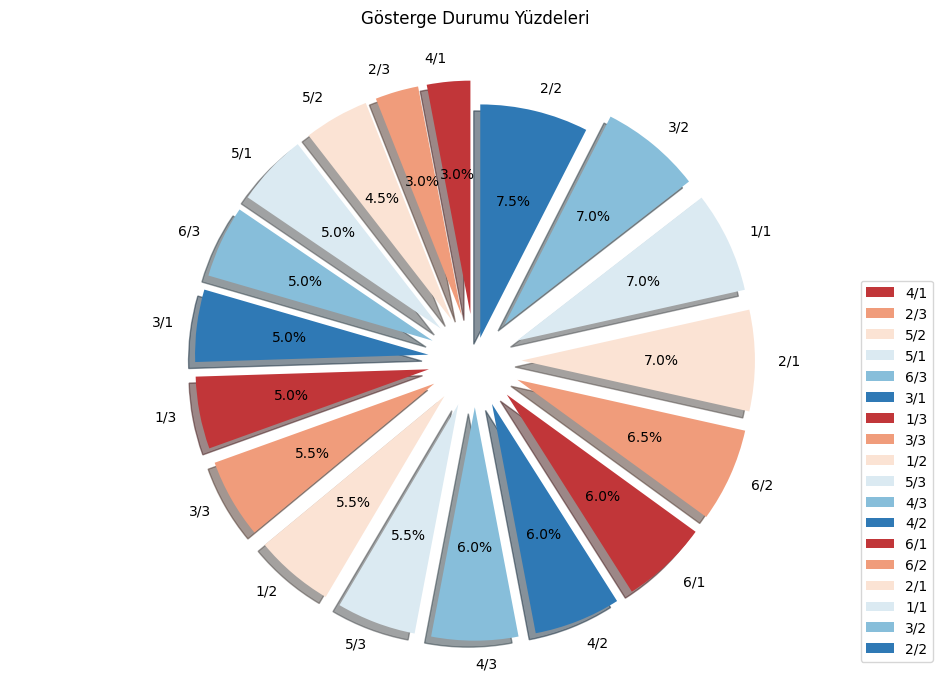

In [211]:
labelsG = [x for x in df["Gosterge"].value_counts().sort_values().index]
lode = tuple([0.2 for x in range(len(labelsG)-1)])
lode = lode + (0.1,)
plt.figure(figsize=([12,8]))
patches,ax,text=plt.pie(df["Gosterge"].value_counts().sort_values(),explode=lode,labels=labelsG,autopct="%1.1f%%",shadow=True,startangle=90)
plt.title("Gösterge Durumu Yüzdeleri\n")
plt.legend(patches,labelsG,loc="lower right")
plt.axis("equal")
plt.show()

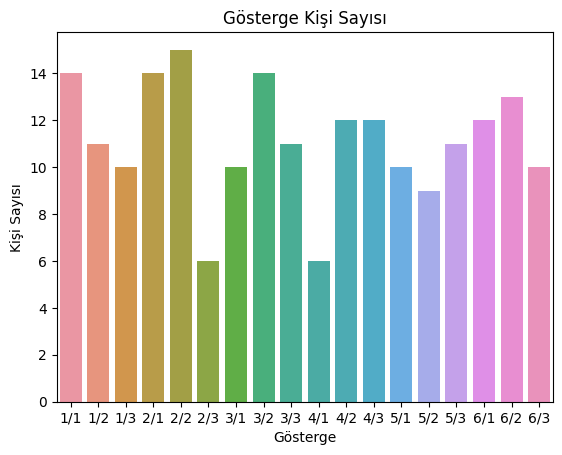

In [212]:
sns.barplot(data=df.groupby("Gosterge")["Mezun"].count().reset_index(), x="Gosterge",y="Mezun")
plt.title("Gösterge Kişi Sayısı")
plt.ylabel("Kişi Sayısı")
plt.xlabel("Gösterge")
plt.show()

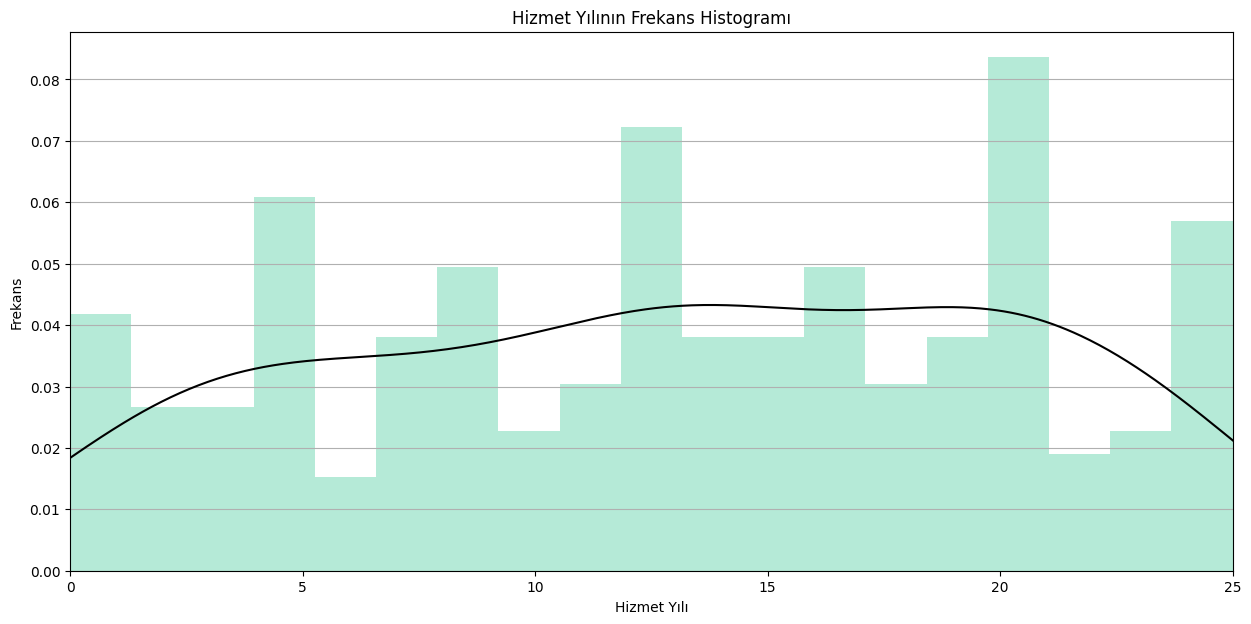

In [213]:
fig, ax = plt.subplots(figsize=[15,7])
df.HizmetYili.plot.kde(ax=ax, legend=False, color="k")
df.HizmetYili.plot.hist(density=True, ax=ax, bins = 19, color="#B5EAD7")
plt.xlim([0,25])
ax.grid(axis='y')
plt.title("Hizmet Yılının Frekans Histogramı")
plt.xlabel("Hizmet Yılı")
plt.ylabel("Frekans")
plt.show()

Text(0.5, 1.0, 'Hizmet Yılı')

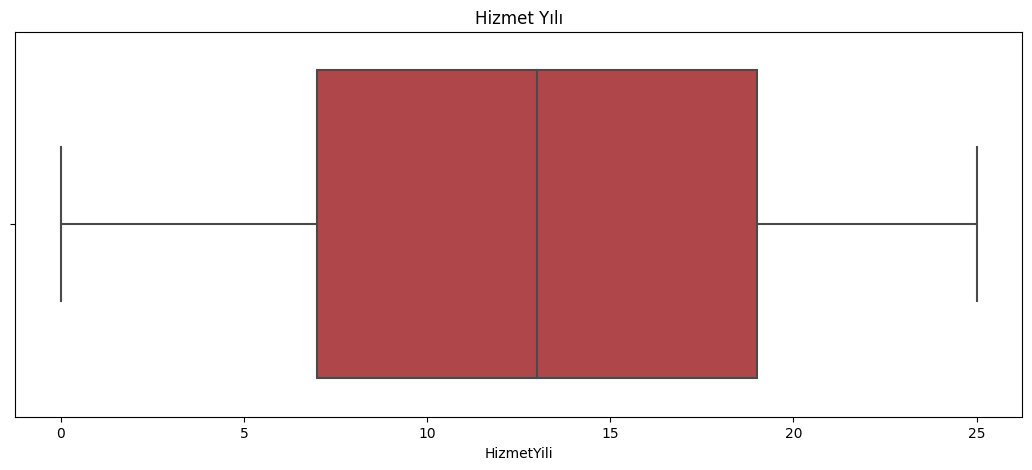

In [214]:
plt.figure(figsize=[13,5])
ax = sns.boxplot(x=df["HizmetYili"])
plt.title("Hizmet Yılı")

<Figure size 800x500 with 0 Axes>

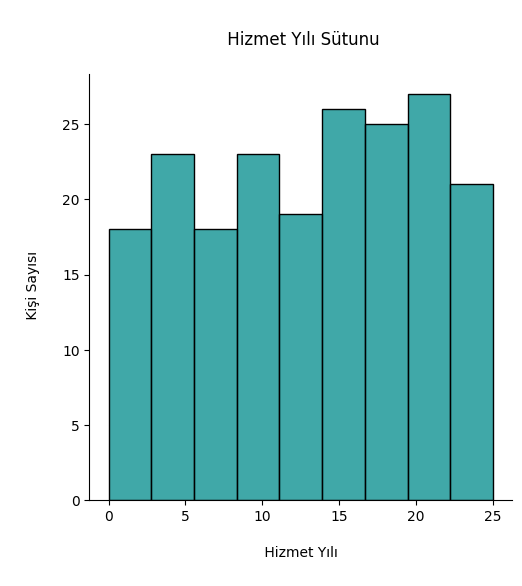

In [215]:
plt.figure(figsize=(8,5))
sns.displot(df.HizmetYili,color="darkcyan")
plt.title('\n Hizmet Yılı Sütunu\n')
plt.xlabel('\n Hizmet Yılı \n')
plt.ylabel('\n Kişi Sayısı\n')
plt.show()

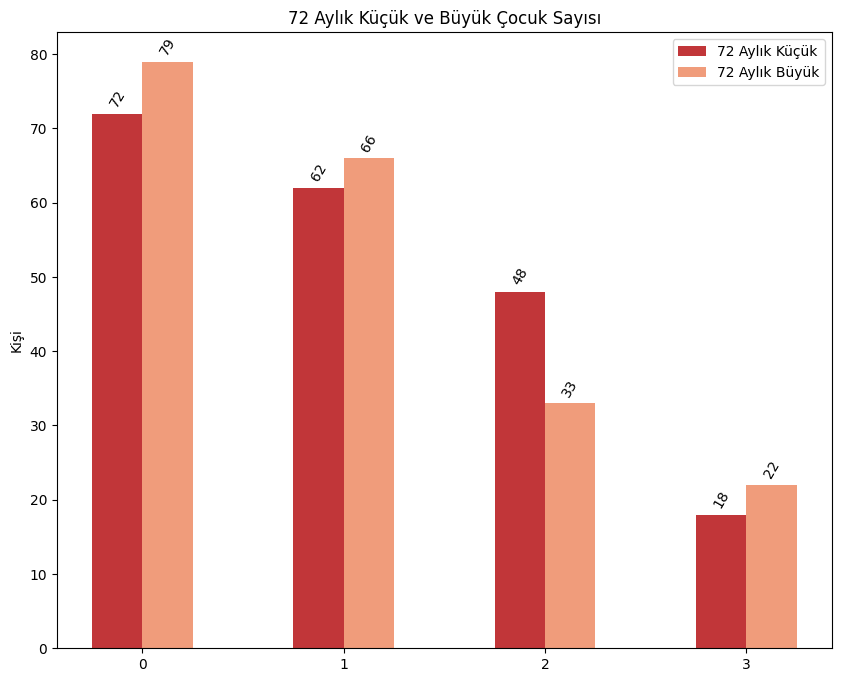

In [216]:
import numpy as np

smallChild = df.groupby("72denKucuk")["Mezun"].count().reset_index()
bigChild = df.groupby("72denBuyuk")["Mezun"].count().reset_index()

x = np.arange(len([0,1,2,3]))  # the label locations
width = 0.25  # the width of the bars

plt.figure(figsize=[10,8])
rects1 = plt.bar(x - width/2, smallChild.Mezun, width, label='72 Aylık Küçük')
rects2 = plt.bar(x + width/2, bigChild.Mezun, width, label='72 Aylık Büyük')

plt.ylabel('Kişi')
plt.title('72 Aylık Küçük ve Büyük Çocuk Sayısı')
plt.xticks([0,1,2,3])
plt.legend()

plt.bar_label(rects1, padding=3,rotation=60)
plt.bar_label(rects2, padding=3,rotation=60)
plt.show()

<Figure size 640x480 with 0 Axes>

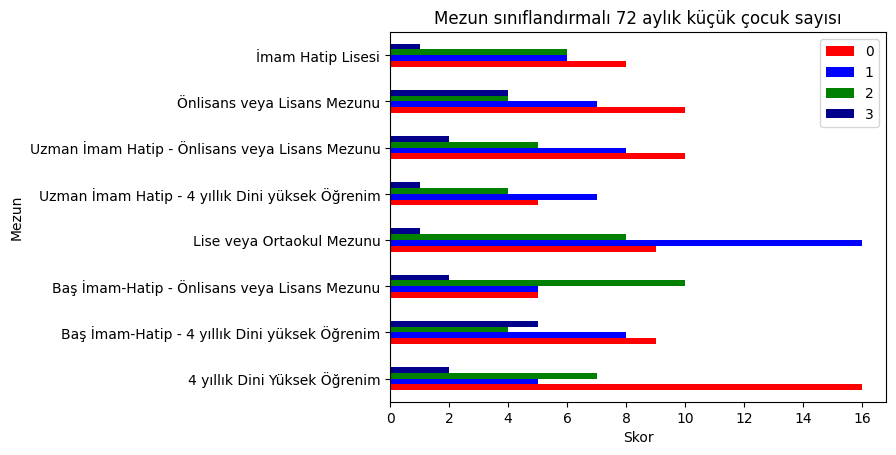

In [217]:
plt.figure()
df.groupby('Mezun')["72denKucuk"].value_counts().unstack().plot.barh(color={0:"red",1:"blue",2:"green",3:"darkblue"})

plt.xlabel('Skor')
plt.title('Mezun sınıflandırmalı 72 aylık küçük çocuk sayısı')
plt.legend()

plt.show()

<Figure size 640x480 with 0 Axes>

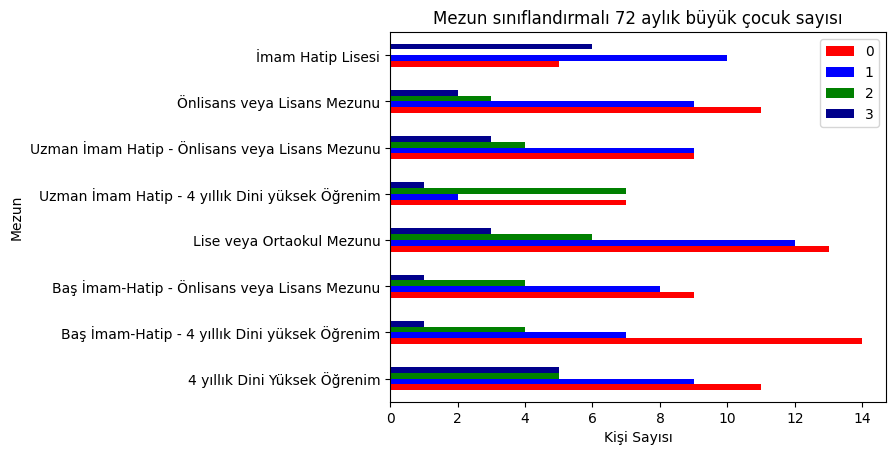

In [218]:
plt.figure()
df.groupby('Mezun')["72denBuyuk"].value_counts().unstack().plot.barh(color={0:"red",1:"blue",2:"green",3:"darkblue"})

plt.ylabel("Mezun")
plt.xlabel("Kişi Sayısı")
plt.title('Mezun sınıflandırmalı 72 aylık büyük çocuk sayısı')
plt.legend()

plt.show()

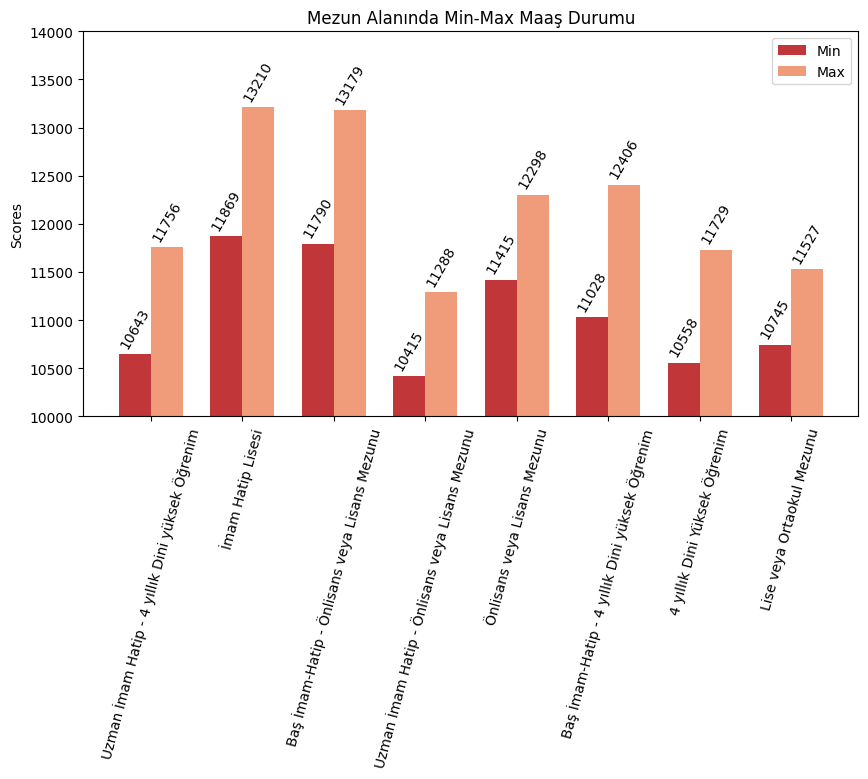

In [220]:
import numpy as np

labels = [x for x in df["Mezun"].value_counts().sort_values().index]
min_salary = df.groupby("Mezun")["Maas"].min().reset_index()
max_salary = df.groupby("Mezun")["Maas"].max().reset_index()


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=[10,5])
rects1 = plt.bar(x - width/2, min_salary.Maas, width, label='Min')
rects2 = plt.bar(x + width/2, max_salary.Maas, width, label='Max')

plt.ylabel('Scores')
plt.ylim([10000,14000])
plt.title('Mezun Alanında Min-Max Maaş Durumu')
plt.xticks(x,labels,rotation=75)
plt.legend()

plt.bar_label(rects1, padding=3,rotation=60)
plt.bar_label(rects2, padding=3,rotation=60)

plt.show()

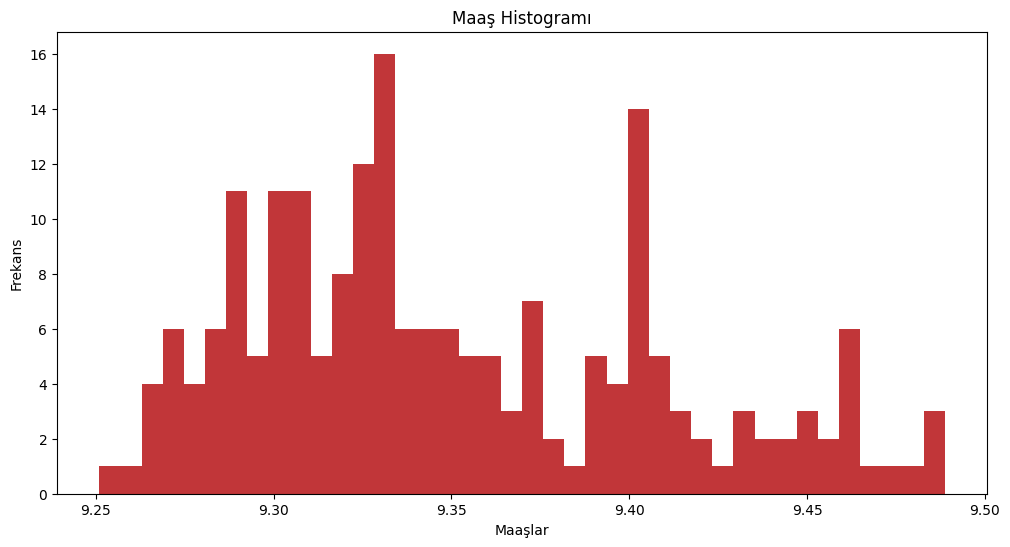

In [221]:
plt.figure(figsize=[12,6])
np.log(df["Maas"]).plot.hist(bins = 40)
plt.title("Maaş Histogramı")
plt.xlabel("Maaşlar")
plt.ylabel("Frekans")
plt.show()

Text(0.5, 1.0, 'Maaş')

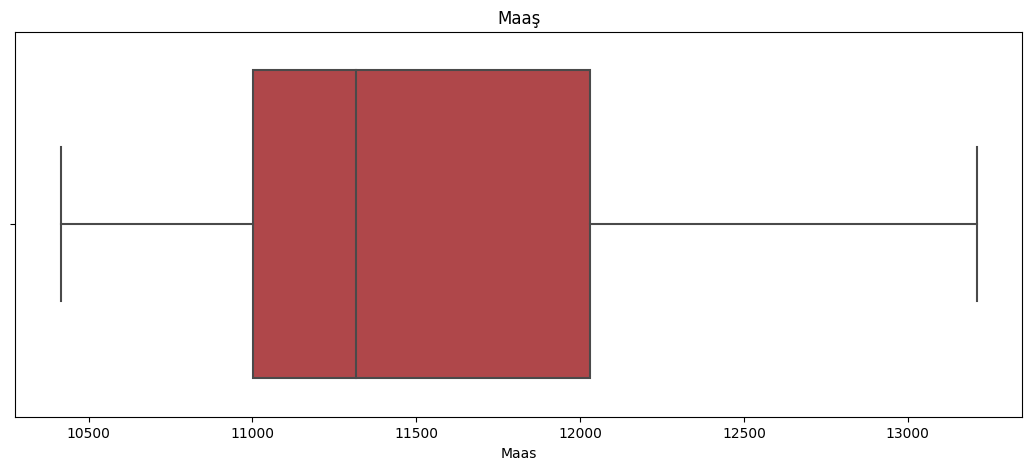

In [222]:
plt.figure(figsize=[13,5])
ax = sns.boxplot(x=df["Maas"])
plt.title("Maaş")

<Figure size 2000x500 with 0 Axes>

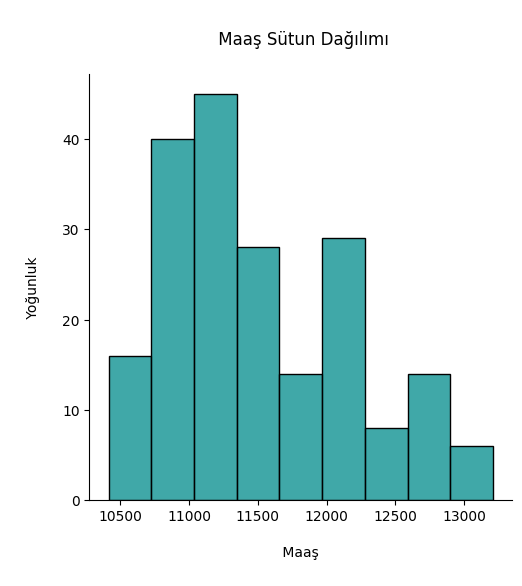

In [225]:
plt.figure(figsize=(20,5))
sns.displot(df.Maas,color="darkcyan")
plt.title('\n Maaş Sütun Dağılımı\n')
plt.xlabel('\n Maaş \n')
plt.ylabel('\n Yoğunluk \n')
plt.show()

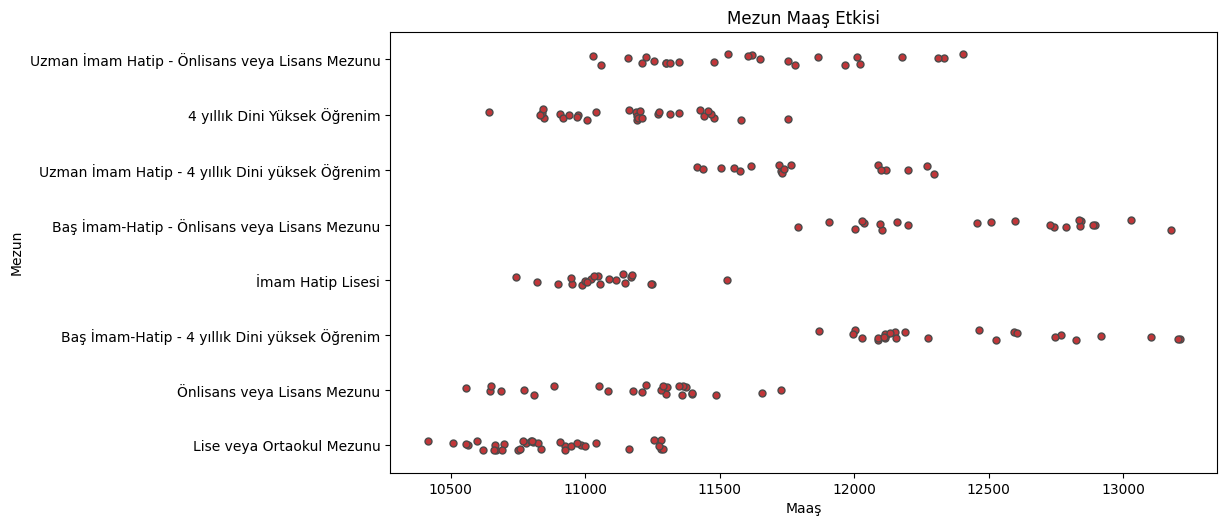

In [230]:
fig, ax = plt.subplots(figsize=[9,5])
plt.tight_layout() 
a=sns.stripplot(x ="Maas", y ="Mezun", jitter=True, linewidth=1,data=df)

plt.title("Mezun Maaş Etkisi")
plt.xlabel("Maaş")
plt.ylabel("Mezun")
plt.show()